# Feedforward ANN (Backprop)

Here we will show the analysis for a single example seed of a network described in [Galloni et al. 2025.](https://www.biorxiv.org/content/10.1101/2025.05.22.655599v2)

In [2]:
import EIANN.EIANN as eiann
from EIANN import utils as ut
eiann.plot.update_plot_defaults()
root_dir = ut.get_project_root()

/Users/ag1880/github-repos/Milstein-Lab/EIANN/EIANN/utils/data_utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### 1. Load MNIST data

In [3]:
train_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_MNIST_dataloaders()

### 2. Load optimized pre-trained EIANN model: 


### Feedforward ANN trained with Backprop

In [4]:
network_name = "20231129_EIANN_2_hidden_mnist_van_bp_relu_SGD_config_G_complete_optimized"
network_seed = 66049
data_seed = 257

If you want to train this network configuration from scratch, you can build a new network object directly from the .yaml configuration file and then train it:

```python
# Create network object
config_file_path = f"../network_config/mnist/{network_name}.yaml"
network = ut.build_EIANN_from_config(config_file_path, network_seed=network_seed)

# Train network
data_generator.manual_seed(data_seed)
network.train(train_dataloader, val_dataloader, 
              epochs = 1,
              samples_per_epoch = 20_000, 
              val_interval = (0, -1, 100), 
              store_history = True,
              store_history_interval = (0, -1, 100), 
              store_dynamics = False, 
              store_params = True,
              status_bar = True)

# Optional: Save network object to pickle file
saved_network_path = root_dir + f"/EIANN/data/mnist/{network_name}_{network_seed}_{data_seed}.pkl"
ut.save_network(spiral_net, path=saved_network_path)


In this case, since we have already trained the network, we will simply load the saved network object that is stored in a pickle (.pkl) file:

In [5]:
saved_network_path = root_dir + f"/EIANN/data/mnist/{network_name}_{network_seed}_{data_seed}.pkl"
network = ut.load_network(saved_network_path)

Loading network from '/Users/ag1880/github-repos/Milstein-Lab/EIANN/EIANN/data/mnist/20231129_EIANN_2_hidden_mnist_van_bp_relu_SGD_config_G_complete_optimized_66049_257.pkl'
Network successfully loaded from '/Users/ag1880/github-repos/Milstein-Lab/EIANN/EIANN/data/mnist/20231129_EIANN_2_hidden_mnist_van_bp_relu_SGD_config_G_complete_optimized_66049_257.pkl'


### 3. Training results

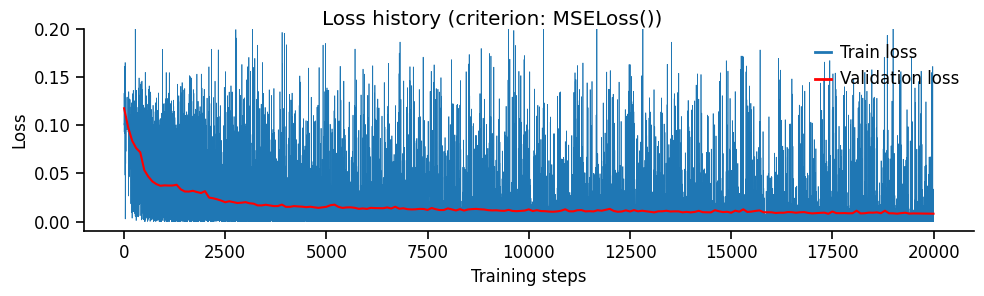

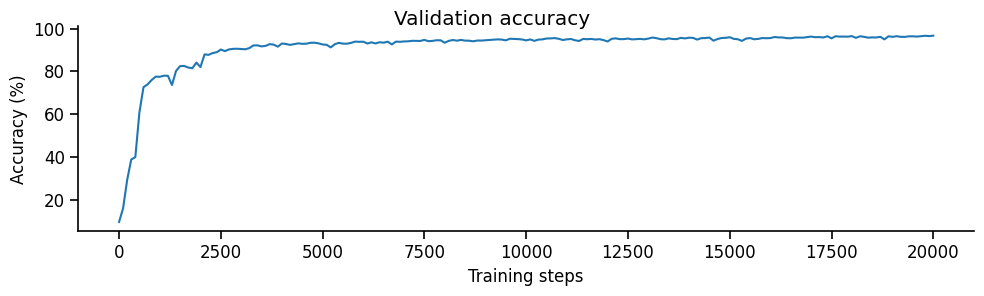

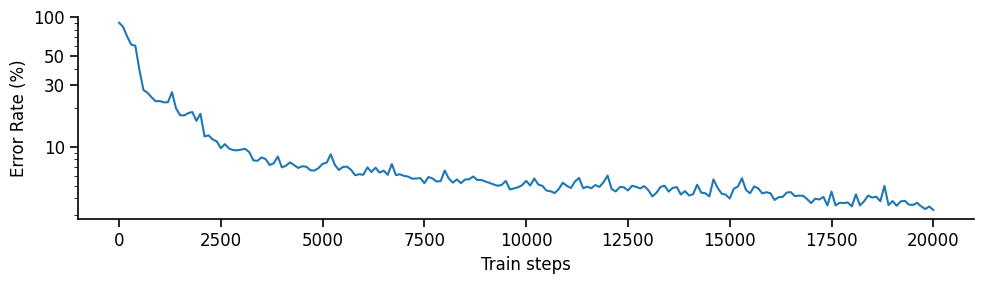

In [9]:
eiann.plot.plot_loss_history(network, ylim=(-0.01, 0.2))
eiann.plot.plot_accuracy_history(network)
eiann.plot.plot_error_history(network)

  0%|          | 0/400 [00:00<?, ?it/s]

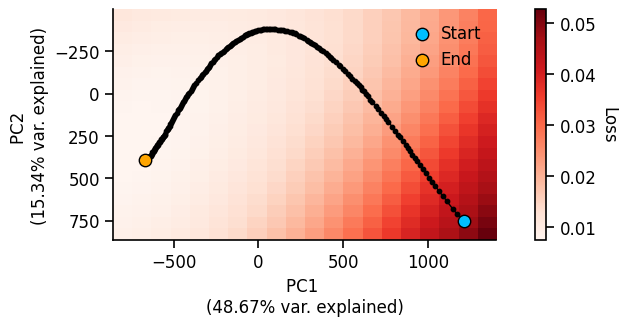

In [6]:
eiann.plot.plot_loss_landscape(test_dataloader, network, num_points=20, extension=0.1, vmax_scale=1.2)

### 4. Analyze population activities

Batch accuracy = 96.11000061035156%


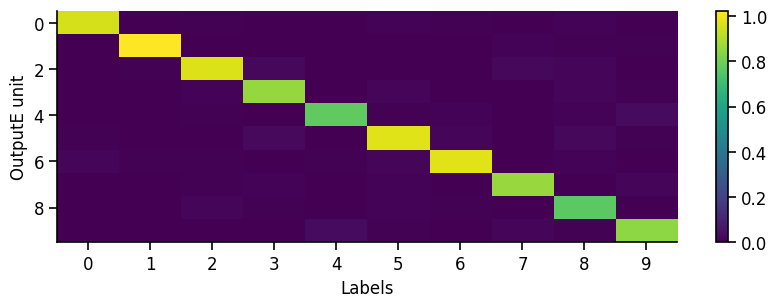

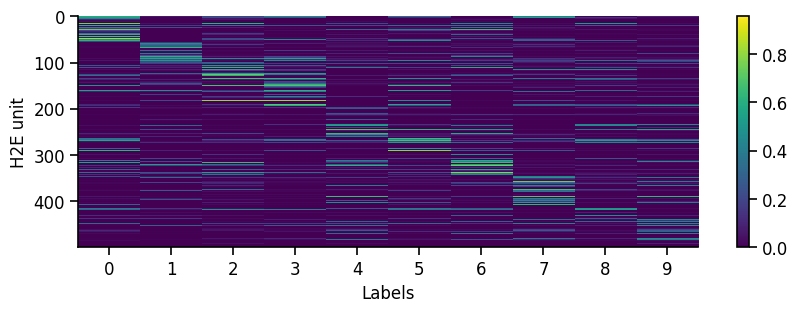

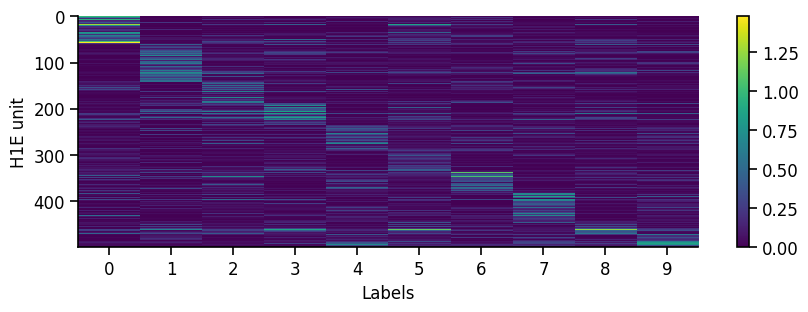

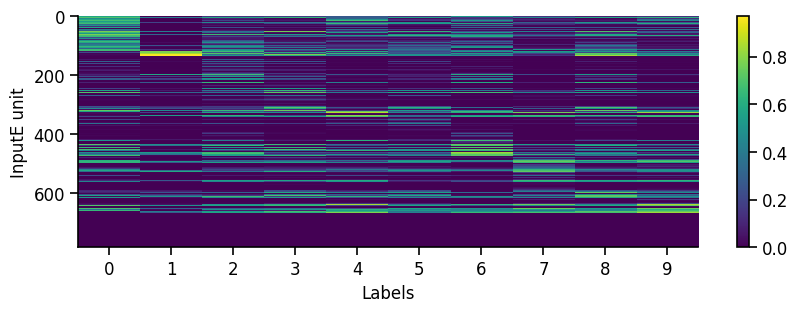

In [22]:
eiann.plot.plot_batch_accuracy(network, test_dataloader, population='all')

### 5. Analyze learned representations

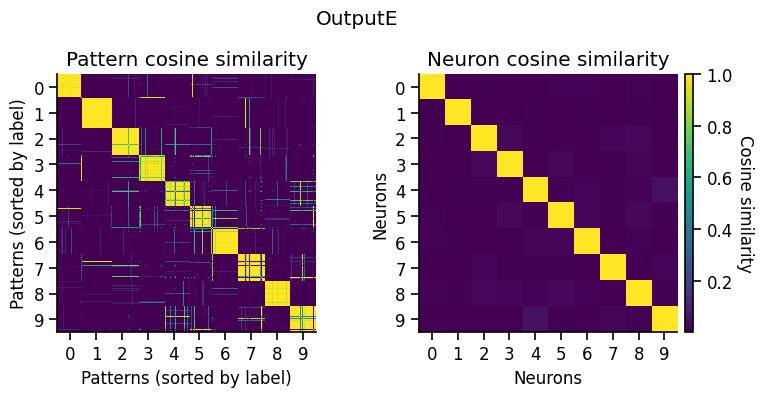

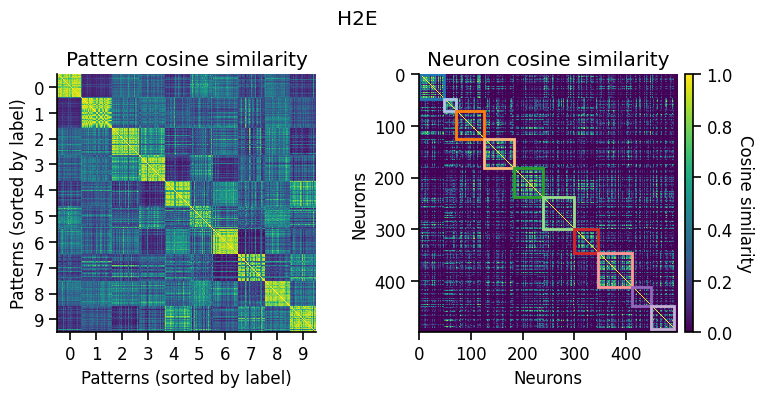

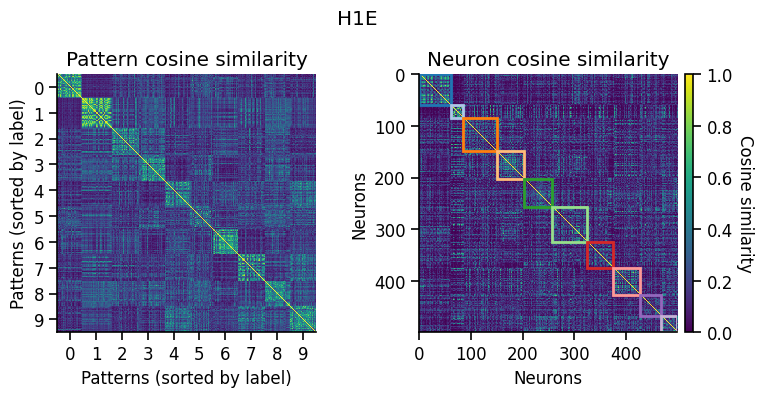

In [5]:
pop_activity_dict, pattern_labels, unit_labels_dict = ut.compute_test_activity(network, test_dataloader, class_average=False, sort=True)
pattern_similarity_matrix_dict, neuron_similarity_matrix_dict = ut.compute_representational_similarity_matrix(pop_activity_dict, pattern_labels, unit_labels_dict, population='E', plot=True)

#### 5.1 Hidden Layer 1

Optimizing receptive field images...


  0%|          | 0/1000 [00:00<?, ?it/s]

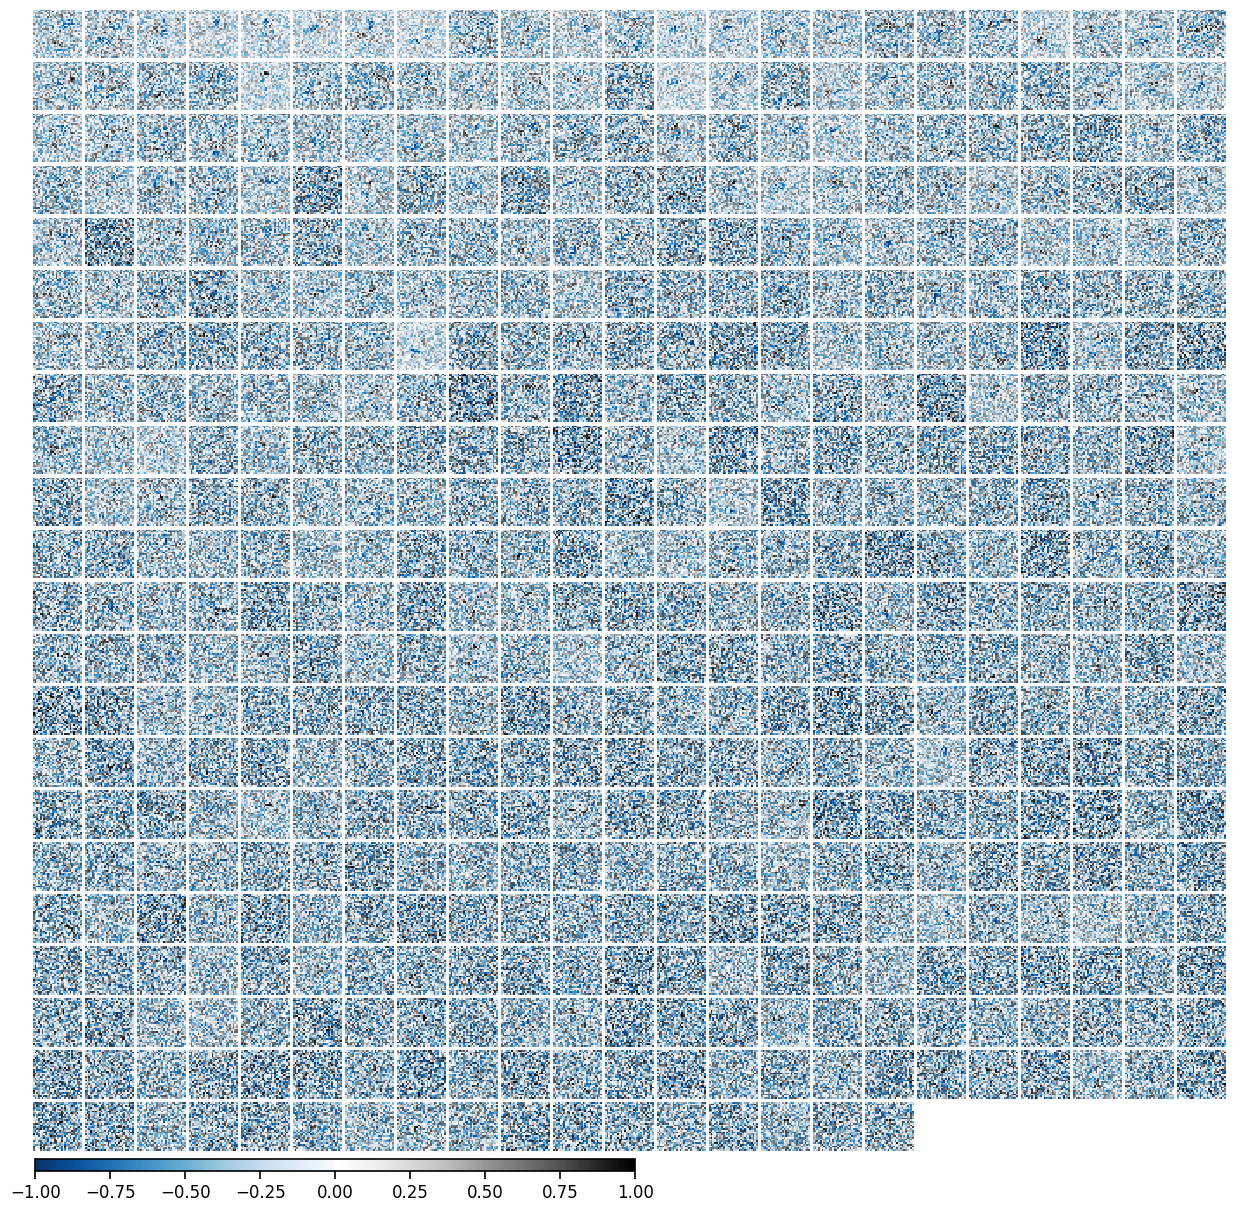

In [19]:
receptive_fields_H1 = ut.compute_maxact_receptive_fields(network.H1.E, test_dataloader=test_dataloader)
eiann.plot.plot_receptive_fields(receptive_fields_H1, sort=True)

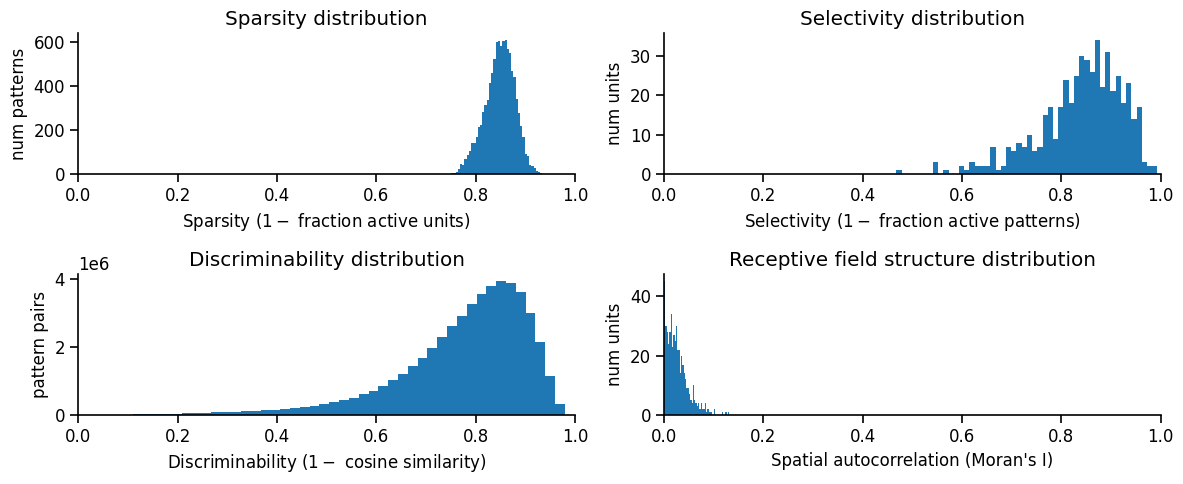

In [23]:
metrics_dict = ut.compute_representation_metrics(population=network.H1.E, dataloader=test_dataloader, receptive_fields=receptive_fields_H1, plot=True)

#### 5.2 Hidden Layer 2

Optimizing receptive field images...


  0%|          | 0/1000 [00:00<?, ?it/s]

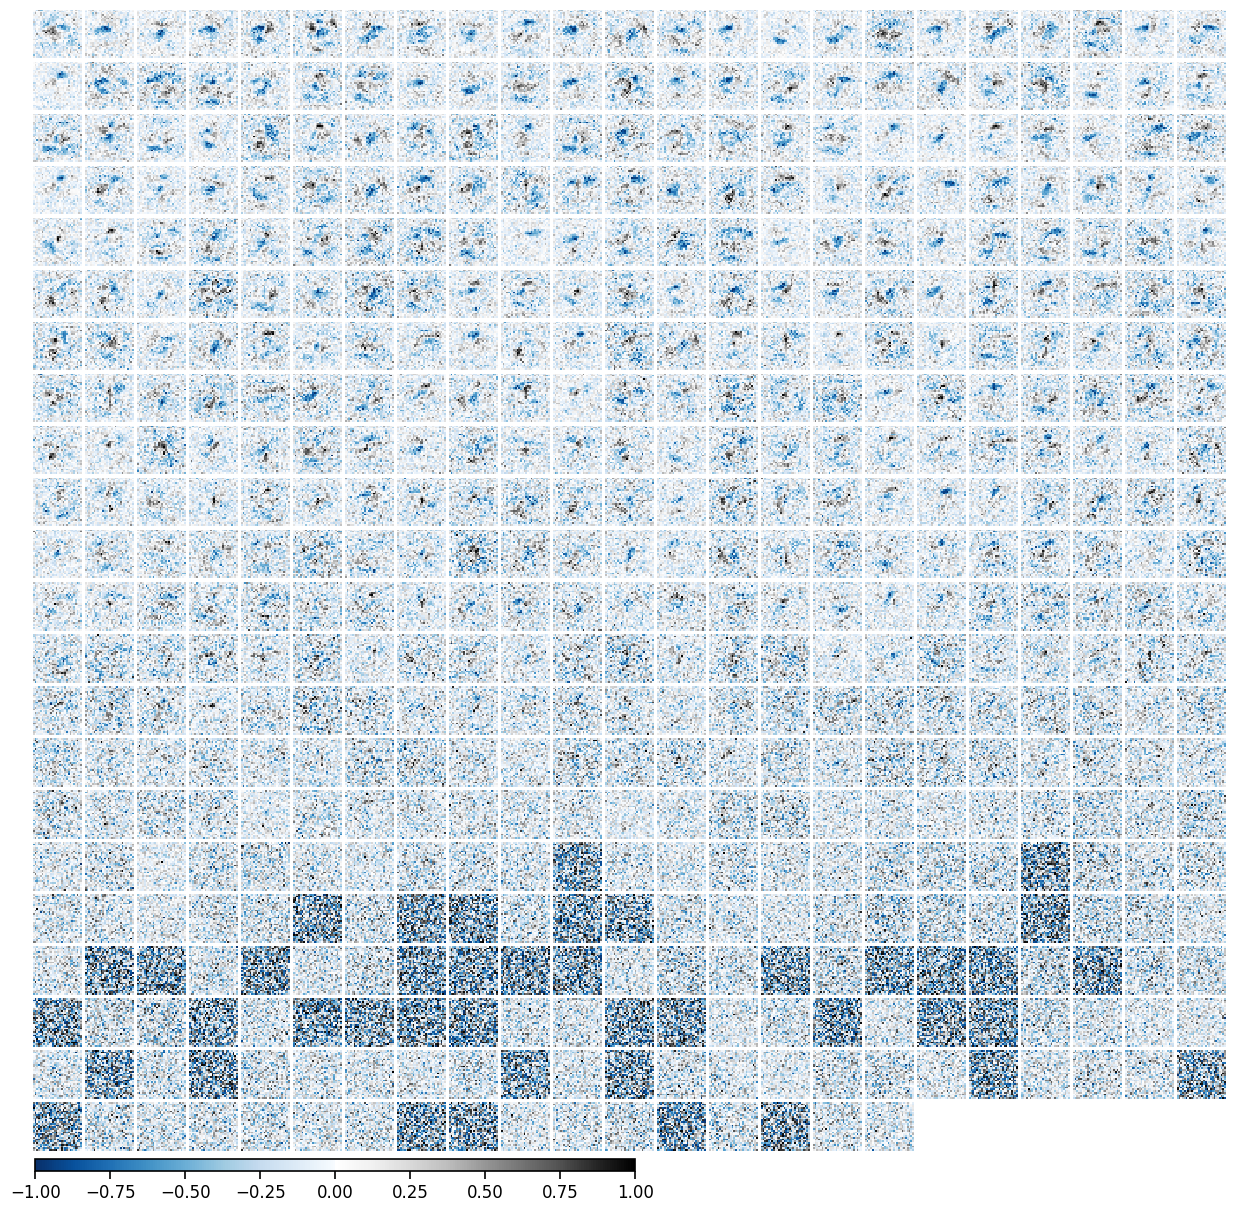

In [24]:
receptive_fields_H2 = ut.compute_maxact_receptive_fields(network.H2.E, test_dataloader=test_dataloader)
eiann.plot.plot_receptive_fields(receptive_fields_H2, sort=True)

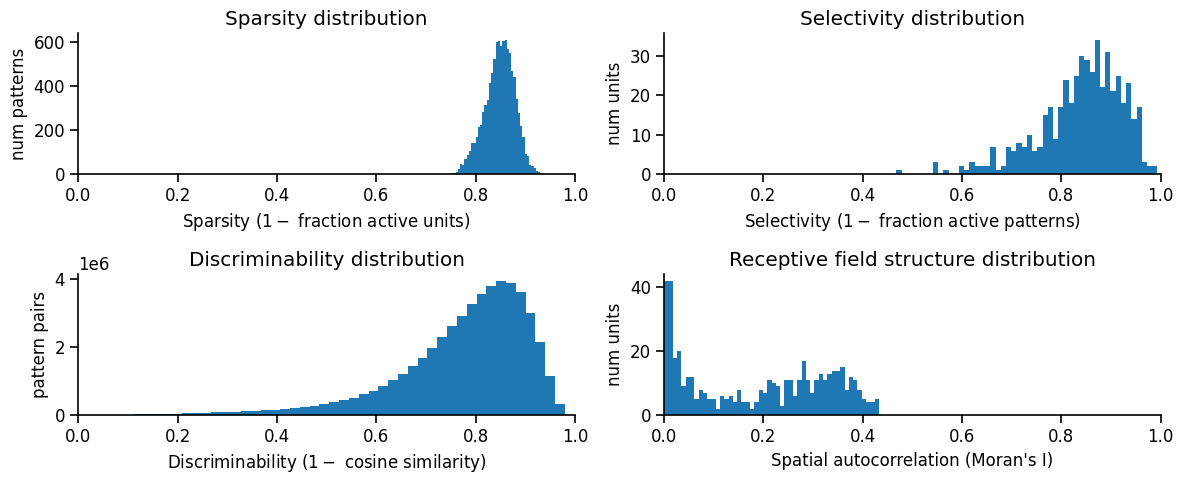

In [26]:
metrics_dict = ut.compute_representation_metrics(population=network.H1.E, dataloader=test_dataloader, receptive_fields=receptive_fields_H2, plot=True)

#### 5.3 Output layer

Optimizing receptive field images...


  0%|          | 0/1000 [00:00<?, ?it/s]

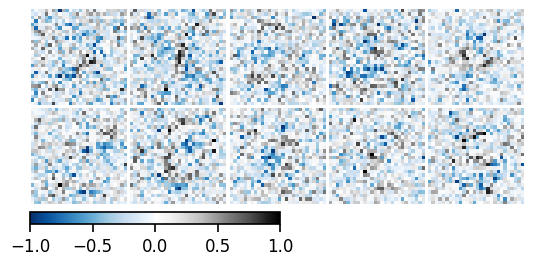

In [7]:
receptive_fields_output = ut.compute_maxact_receptive_fields(network.Output.E, test_dataloader=test_dataloader)
eiann.plot.plot_receptive_fields(receptive_fields_output, sort=False)